# Final Project - Cifar 10 

#### The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. We will be building a model that predicts/classifies what classes the images fall into. For this project, we will be using Keras.

## Getting Data

#### To begin, we will load the cifar-10 dataset. X_train and y_train will contain information for 50,000 training images. X_test and y_test will contain information for 10,000 test images. We will leave the test images alone and only test on the model that produces the best result on the validation set. We also create an array that labels what the 10 classes should be.

#### Additionally, we will create a validation set once we train the model, randomly assigning 20% of the data to be validation data. 

In [0]:
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.utils import print_summary, to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from keras import regularizers

import numpy as np
import os

import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix


(x_train, y_train), (x_test, y_test) = cifar10.load_data()  
                                                            
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


## Useful Helper Functions

#### Below, we will create a few helper functions that will help us evaluate our model. 

### **Validation Helper**

#### This helper function will help plot the training and validation loss graph to see if we're underfitting or overfitting the data. We will also plot the training and validation accuracy data to compare with the loss.

### **Test Set Evaluation**
#### The first function (get_class_from_softmax) will help us turn an array of probabilities of likelihood of each class (softmax_list) to a the index of the maximum probability, which we can convert to a class using the label_names array (convert_to_labels function).

#### We will then use the helpers above in the get_metrics function, which will produce a classification report and confusion matrix for the test set. 





In [0]:
# Training vs validation loss graph

import matplotlib.pyplot as plt

def plot_graphs(history):
  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

  # Plot training & validation accuracy values
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()




In [0]:
## Here we'll use the model to classify the test set!
import pandas as pd

def get_class_from_softmax(softmax_list):
    maximum = 0
    max_index = 0

    for i in range(len(softmax_list)):
      if softmax_list[i] > maximum:
        maximum = softmax_list[i]
        max_index = i
  
    return max_index

def convert_to_labels(A):
  labels = list()
  for row in A:
    labels.append(label_names[get_class_from_softmax(row)])
  return labels

def get_metrics(model_name):
  model = load_model(model_name)

  print(model.evaluate(x=x_test, y=to_categorical(y_test, num_classes)))

  predicted = model.predict(x_test)


  predicted_labels = convert_to_labels(predicted)
  actual_labels = convert_to_labels(to_categorical(y_test, num_classes)) 

  # Generate classification report
  print(classification_report(y_true=actual_labels, 
                            y_pred=predicted_labels, 
                            labels=label_names))

  # Generate the confusion matrix
  matrix = pd.DataFrame(
      confusion_matrix(actual_labels, predicted_labels, labels=label_names), 
      index=label_names, 
      columns=['predicted - airplane', 
               'predicted - automobile', 
               'predicted - bird', 
               'predicted - cat', 
               'predicted - deer', 
               'predicted - dog', 
               'predicted - frog', 
               'predicted - horse', 
               'predicted - ship', 
               'predicted - truck']
  )
  pd.set_option('display.max_columns', None) 

  print(matrix)


## **Model Creating, Training, and Validating**

#### We will begin with a batch size of 32 and 25 epochs.

#### Additionally, note that when we're training(fitting) the model, we add the validation split of 0.2, which splits the training data randomly into 80% training and 20% validation so we can see how well the model is performing. We will be using this split for all models below.


```
history = model.fit(x_train,
          to_categorical(y_train, num_classes),
          epochs=epochs,
          verbose=2,
          validation_split=0.2,
          shuffle=True)
```



In [0]:
batch_size = 32 
num_classes = 10
epochs = 25

shape = (32, 32, 3)


## **Model #1**
#### For our first model, we will begin by creating a 6 layer CNN. For the optimizer, we will arbitrarily choose "RMSprop". We will test different optimizers as we proceed as well as additional layers.

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', 
                 kernel_initializer='random_uniform',
                 input_shape=shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3),
                 padding='same',
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Compile the model
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

print(model.summary())

#Train model
history = model.fit(x_train,
          to_categorical(y_train, num_classes),
          epochs=epochs,
          verbose=2,
          validation_split=0.2,
          shuffle=True)

#Save model
model.save('model_1.h5', overwrite=True)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_______________________________________________________

### Validating Model #1

#### We can see from the plot below that we are heavily overfitting the data. To prevent this, we will try adding regularization. 

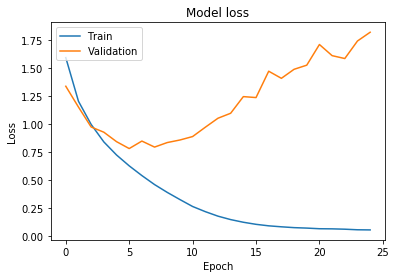

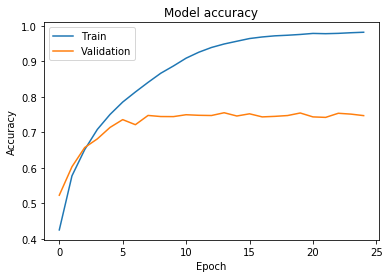

In [0]:
plot_graphs(history)

## **Model #2 - Regularization with Weight Decay**

### We will try adding a weight decay of 0.0005 (default)



In [0]:
from keras import regularizers

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', 
                 kernel_initializer='random_uniform',
                 input_shape=shape,
                 kernel_regularizer=regularizers.l2()))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3),
                 padding='same',
                 kernel_initializer='random_uniform',
                 kernel_regularizer=regularizers.l2()))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform',
                 kernel_regularizer=regularizers.l2()))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform',
                 kernel_regularizer=regularizers.l2()))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform',
                 kernel_regularizer=regularizers.l2()))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform',
                 kernel_regularizer=regularizers.l2()))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Compile the model
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

#Train model
history1 = model.fit(x_train,
          to_categorical(y_train, num_classes),
          epochs=epochs,
          verbose=2,
          validation_split=0.2,
          shuffle=True)

#Save model
model.save('model_2_part1.h5', overwrite=True)


Train on 40000 samples, validate on 10000 samples
Epoch 1/25
40000/40000 - 20s - loss: 2.8412 - acc: 0.4051 - val_loss: 2.2614 - val_acc: 0.5002
Epoch 2/25
40000/40000 - 12s - loss: 2.0279 - acc: 0.5384 - val_loss: 1.8188 - val_acc: 0.5744
Epoch 3/25
40000/40000 - 13s - loss: 1.6899 - acc: 0.6036 - val_loss: 1.5477 - val_acc: 0.6357
Epoch 4/25
40000/40000 - 12s - loss: 1.4689 - acc: 0.6517 - val_loss: 1.4261 - val_acc: 0.6608
Epoch 5/25
40000/40000 - 13s - loss: 1.3099 - acc: 0.6872 - val_loss: 1.3336 - val_acc: 0.6715
Epoch 6/25
40000/40000 - 13s - loss: 1.1912 - acc: 0.7153 - val_loss: 1.2332 - val_acc: 0.7037
Epoch 7/25
40000/40000 - 13s - loss: 1.0914 - acc: 0.7416 - val_loss: 1.1738 - val_acc: 0.7123
Epoch 8/25
40000/40000 - 13s - loss: 1.0148 - acc: 0.7612 - val_loss: 1.1587 - val_acc: 0.7119
Epoch 9/25
40000/40000 - 13s - loss: 0.9502 - acc: 0.7790 - val_loss: 1.1558 - val_acc: 0.7120
Epoch 10/25
40000/40000 - 13s - loss: 0.8894 - acc: 0.7993 - val_loss: 1.0117 - val_acc: 0.7581

#### Now, we can see that the training and validation loss are closer to each other! We are overfitting a bit less; however, we can improve this model. Let's continue to try with different weight decays.


#### Weight decay of 0.00005

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', 
                 kernel_initializer='random_uniform',
                 input_shape=shape,
                 kernel_regularizer=regularizers.l2(0.00005)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3),
                 padding='same',
                 kernel_initializer='random_uniform',
                 kernel_regularizer=regularizers.l2(0.00005)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform',
                 kernel_regularizer=regularizers.l2(0.00005)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform',
                 kernel_regularizer=regularizers.l2(0.00005)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform',
                 kernel_regularizer=regularizers.l2(0.00005)))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform',
                 kernel_regularizer=regularizers.l2(0.00005)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Compile the model
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

#Train model
history2 = model.fit(x_train,
          to_categorical(y_train, num_classes),
          epochs=epochs,
          verbose=2,
          validation_split=0.2,
          shuffle=True)

#Save model
model.save('model_2_part2.h5', overwrite=True)


Train on 40000 samples, validate on 10000 samples
Epoch 1/25
40000/40000 - 20s - loss: 1.6239 - acc: 0.4171 - val_loss: 1.3006 - val_acc: 0.5461
Epoch 2/25
40000/40000 - 13s - loss: 1.2038 - acc: 0.5789 - val_loss: 1.1822 - val_acc: 0.6013
Epoch 3/25
40000/40000 - 13s - loss: 0.9981 - acc: 0.6535 - val_loss: 0.9808 - val_acc: 0.6609
Epoch 4/25
40000/40000 - 13s - loss: 0.8509 - acc: 0.7084 - val_loss: 0.8734 - val_acc: 0.7075
Epoch 5/25
40000/40000 - 13s - loss: 0.7345 - acc: 0.7496 - val_loss: 0.9499 - val_acc: 0.6783
Epoch 6/25
40000/40000 - 13s - loss: 0.6365 - acc: 0.7861 - val_loss: 0.8492 - val_acc: 0.7271
Epoch 7/25
40000/40000 - 13s - loss: 0.5523 - acc: 0.8152 - val_loss: 0.7895 - val_acc: 0.7444
Epoch 8/25
40000/40000 - 12s - loss: 0.4699 - acc: 0.8444 - val_loss: 0.8096 - val_acc: 0.7415
Epoch 9/25
40000/40000 - 12s - loss: 0.4002 - acc: 0.8667 - val_loss: 0.8677 - val_acc: 0.7435
Epoch 10/25
40000/40000 - 13s - loss: 0.3332 - acc: 0.8898 - val_loss: 0.8790 - val_acc: 0.7421

#### Weight decay of 0.05

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', 
                 kernel_initializer='random_uniform',
                 input_shape=shape,
                 kernel_regularizer=regularizers.l2(0.05)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3),
                 padding='same',
                 kernel_initializer='random_uniform',
                 kernel_regularizer=regularizers.l2(0.05)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform',
                 kernel_regularizer=regularizers.l2(0.05)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform',
                 kernel_regularizer=regularizers.l2(0.05)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform',
                 kernel_regularizer=regularizers.l2(0.05)))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform',
                 kernel_regularizer=regularizers.l2(0.05)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Compile the model
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

#Train model
history3 = model.fit(x_train,
          to_categorical(y_train, num_classes),
          epochs=epochs,
          verbose=2,
          validation_split=0.2,
          shuffle=True)

#Save model
model.save('model_2_part3.h5', overwrite=True)


Train on 40000 samples, validate on 10000 samples
Epoch 1/25
40000/40000 - 20s - loss: 4.7571 - acc: 0.3735 - val_loss: 2.5774 - val_acc: 0.4506
Epoch 2/25
40000/40000 - 13s - loss: 2.2108 - acc: 0.4658 - val_loss: 1.9172 - val_acc: 0.5055
Epoch 3/25
40000/40000 - 13s - loss: 1.8150 - acc: 0.5124 - val_loss: 1.6739 - val_acc: 0.5514
Epoch 4/25
40000/40000 - 13s - loss: 1.6372 - acc: 0.5481 - val_loss: 1.6642 - val_acc: 0.5279
Epoch 5/25
40000/40000 - 13s - loss: 1.5275 - acc: 0.5727 - val_loss: 1.6020 - val_acc: 0.5425
Epoch 6/25
40000/40000 - 13s - loss: 1.4457 - acc: 0.5938 - val_loss: 1.4015 - val_acc: 0.6060
Epoch 7/25
40000/40000 - 13s - loss: 1.3846 - acc: 0.6139 - val_loss: 1.4191 - val_acc: 0.6046
Epoch 8/25
40000/40000 - 13s - loss: 1.3289 - acc: 0.6331 - val_loss: 1.3470 - val_acc: 0.6224
Epoch 9/25
40000/40000 - 13s - loss: 1.2845 - acc: 0.6452 - val_loss: 1.3618 - val_acc: 0.6209
Epoch 10/25
40000/40000 - 13s - loss: 1.2481 - acc: 0.6583 - val_loss: 1.2855 - val_acc: 0.6403

#### Weight decay of 0

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', 
                 kernel_initializer='random_uniform',
                 input_shape=shape,
                 kernel_regularizer=regularizers.l2(0)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3),
                 padding='same',
                 kernel_initializer='random_uniform',
                 kernel_regularizer=regularizers.l2(0)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform',
                 kernel_regularizer=regularizers.l2(0)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform',
                 kernel_regularizer=regularizers.l2(0)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform',
                 kernel_regularizer=regularizers.l2(0)))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform',
                 kernel_regularizer=regularizers.l2(0)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Compile the model
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

#Train model
history4 = model.fit(x_train,
          to_categorical(y_train, num_classes),
          epochs=epochs,
          verbose=2,
          validation_split=0.2,
          shuffle=True)

#Save model
model.save('model_2_part4.h5', overwrite=True)


Train on 40000 samples, validate on 10000 samples
Epoch 1/25
40000/40000 - 20s - loss: 1.5688 - acc: 0.4353 - val_loss: 1.3902 - val_acc: 0.5000
Epoch 2/25
40000/40000 - 12s - loss: 1.1755 - acc: 0.5842 - val_loss: 1.1016 - val_acc: 0.6126
Epoch 3/25
40000/40000 - 12s - loss: 0.9641 - acc: 0.6640 - val_loss: 0.9293 - val_acc: 0.6826
Epoch 4/25
40000/40000 - 12s - loss: 0.8164 - acc: 0.7182 - val_loss: 0.8757 - val_acc: 0.7034
Epoch 5/25
40000/40000 - 12s - loss: 0.7024 - acc: 0.7575 - val_loss: 0.8251 - val_acc: 0.7245
Epoch 6/25
40000/40000 - 12s - loss: 0.6080 - acc: 0.7913 - val_loss: 0.7696 - val_acc: 0.7414
Epoch 7/25
40000/40000 - 12s - loss: 0.5219 - acc: 0.8204 - val_loss: 0.7703 - val_acc: 0.7437
Epoch 8/25
40000/40000 - 12s - loss: 0.4447 - acc: 0.8470 - val_loss: 0.8055 - val_acc: 0.7478
Epoch 9/25
40000/40000 - 12s - loss: 0.3731 - acc: 0.8709 - val_loss: 0.9227 - val_acc: 0.7297
Epoch 10/25
40000/40000 - 12s - loss: 0.3073 - acc: 0.8944 - val_loss: 0.8496 - val_acc: 0.7526

### Validation

Weight decay default 0.0005


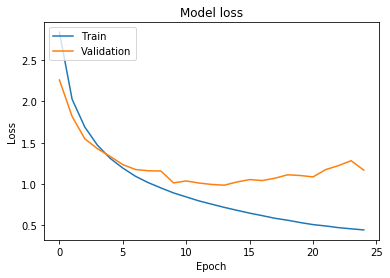

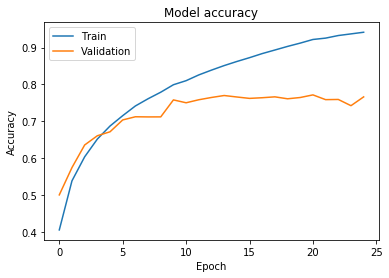

Weight decay default 0.00005


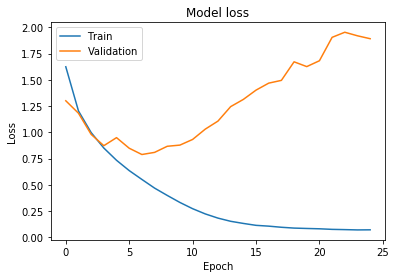

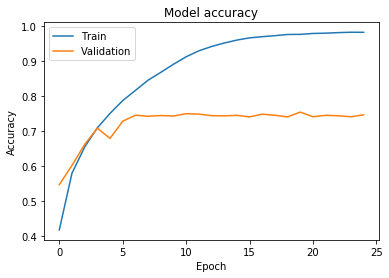

Weight decay default 0.05


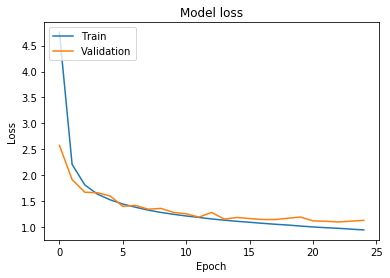

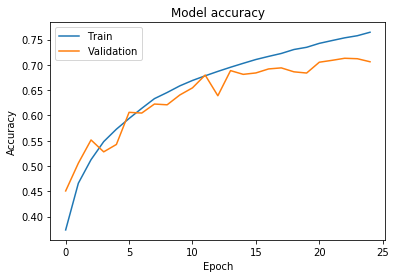

Weight decay default 0


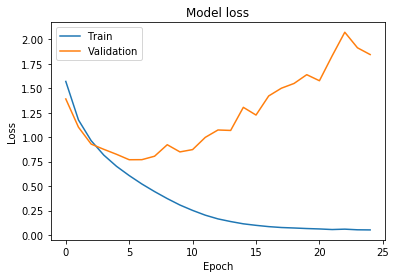

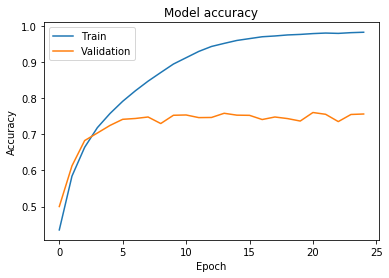

In [0]:
print("Weight decay default 0.0005")
plot_graphs(history1)

print("Weight decay default 0.00005")
plot_graphs(history2)

print("Weight decay default 0.05")
plot_graphs(history3)

print("Weight decay default 0")
plot_graphs(history4)


#### As we can see by the graphs above, weight decay of 0.05 does well to reduce the difference between the training and validation model loss. However, it sacrifices some accuracy. The weight decay of 0.0005 has a relatively good accuracy but has a large gap between the training and validation model loss (overfitting). We shall proceed with the 0.05 weight decay or combine the 0.0005 weight decay with another regularization to further prevent overfitting.

## **Model #3 - Regularization with Dropout Layer**

#### We will try adding a dropout layer of 0.25 for each step. We will also try a dropout of 0.5 as well a model with increasing levels of dropout.



### Dropout 0.25

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', 
                 kernel_initializer='random_uniform',
                 input_shape=shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3),
                 padding='same',
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Compile the model
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

#Train model
history1 = model.fit(x_train,
          to_categorical(y_train, num_classes),
          epochs=epochs,
          verbose=2,
          validation_split=0.2,
          shuffle=True)

#Save model
model.save('model_3_part1.h5', overwrite=True)


Train on 40000 samples, validate on 10000 samples
Epoch 1/25
40000/40000 - 20s - loss: 1.7901 - acc: 0.3407 - val_loss: 1.5220 - val_acc: 0.4631
Epoch 2/25
40000/40000 - 13s - loss: 1.4017 - acc: 0.4910 - val_loss: 1.1977 - val_acc: 0.5840
Epoch 3/25
40000/40000 - 13s - loss: 1.2017 - acc: 0.5708 - val_loss: 1.0828 - val_acc: 0.6257
Epoch 4/25
40000/40000 - 13s - loss: 1.0708 - acc: 0.6209 - val_loss: 0.9911 - val_acc: 0.6521
Epoch 5/25
40000/40000 - 13s - loss: 0.9753 - acc: 0.6580 - val_loss: 0.8944 - val_acc: 0.6891
Epoch 6/25
40000/40000 - 13s - loss: 0.8979 - acc: 0.6852 - val_loss: 0.8760 - val_acc: 0.7004
Epoch 7/25
40000/40000 - 13s - loss: 0.8461 - acc: 0.7045 - val_loss: 0.8249 - val_acc: 0.7214
Epoch 8/25
40000/40000 - 13s - loss: 0.8025 - acc: 0.7218 - val_loss: 0.7604 - val_acc: 0.7410
Epoch 9/25
40000/40000 - 13s - loss: 0.7602 - acc: 0.7364 - val_loss: 0.7194 - val_acc: 0.7532
Epoch 10/25
40000/40000 - 13s - loss: 0.7308 - acc: 0.7475 - val_loss: 0.7207 - val_acc: 0.7509

### Dropout 0.5

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', 
                 kernel_initializer='random_uniform',
                 input_shape=shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3),
                 padding='same',
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Compile the model
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

#Train model
history2 = model.fit(x_train,
          to_categorical(y_train, num_classes),
          epochs=epochs,
          verbose=2,
          validation_split=0.2,
          shuffle=True)

#Save model
model.save('model_3_part2.h5', overwrite=True)


Train on 40000 samples, validate on 10000 samples
Epoch 1/25
40000/40000 - 20s - loss: 2.0588 - acc: 0.2271 - val_loss: 1.7303 - val_acc: 0.3730
Epoch 2/25
40000/40000 - 13s - loss: 1.6801 - acc: 0.3812 - val_loss: 1.6171 - val_acc: 0.4129
Epoch 3/25
40000/40000 - 13s - loss: 1.5185 - acc: 0.4439 - val_loss: 1.4503 - val_acc: 0.4793
Epoch 4/25
40000/40000 - 13s - loss: 1.4118 - acc: 0.4872 - val_loss: 1.2691 - val_acc: 0.5562
Epoch 5/25
40000/40000 - 13s - loss: 1.3326 - acc: 0.5207 - val_loss: 1.2628 - val_acc: 0.5499
Epoch 6/25
40000/40000 - 13s - loss: 1.2555 - acc: 0.5507 - val_loss: 1.1990 - val_acc: 0.5720
Epoch 7/25
40000/40000 - 13s - loss: 1.1948 - acc: 0.5756 - val_loss: 1.1330 - val_acc: 0.5991
Epoch 8/25
40000/40000 - 13s - loss: 1.1514 - acc: 0.5938 - val_loss: 1.0354 - val_acc: 0.6338
Epoch 9/25
40000/40000 - 13s - loss: 1.1173 - acc: 0.6089 - val_loss: 1.0001 - val_acc: 0.6501
Epoch 10/25
40000/40000 - 13s - loss: 1.0780 - acc: 0.6209 - val_loss: 1.0033 - val_acc: 0.6409

### Dropout increasing from 0.15 to 0.45

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', 
                 kernel_initializer='random_uniform',
                 input_shape=shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3),
                 padding='same',
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.15))

model.add(Conv2D(64, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.45))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Compile the model
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

#Train model
history3 = model.fit(x_train,
          to_categorical(y_train, num_classes),
          epochs=epochs,
          verbose=2,
          validation_split=0.2,
          shuffle=True)

#Save model
model.save('model_3_part3.h5', overwrite=True)


Train on 40000 samples, validate on 10000 samples
Epoch 1/25
40000/40000 - 20s - loss: 1.8625 - acc: 0.3076 - val_loss: 1.5225 - val_acc: 0.4586
Epoch 2/25
40000/40000 - 13s - loss: 1.4921 - acc: 0.4582 - val_loss: 1.3287 - val_acc: 0.5293
Epoch 3/25
40000/40000 - 13s - loss: 1.3044 - acc: 0.5333 - val_loss: 1.1574 - val_acc: 0.5823
Epoch 4/25
40000/40000 - 13s - loss: 1.1641 - acc: 0.5888 - val_loss: 1.0121 - val_acc: 0.6407
Epoch 5/25
40000/40000 - 13s - loss: 1.0642 - acc: 0.6251 - val_loss: 0.9195 - val_acc: 0.6829
Epoch 6/25
40000/40000 - 13s - loss: 0.9907 - acc: 0.6522 - val_loss: 0.8662 - val_acc: 0.7002
Epoch 7/25
40000/40000 - 13s - loss: 0.9320 - acc: 0.6741 - val_loss: 0.7970 - val_acc: 0.7180
Epoch 8/25
40000/40000 - 13s - loss: 0.8830 - acc: 0.6923 - val_loss: 0.7806 - val_acc: 0.7291
Epoch 9/25
40000/40000 - 13s - loss: 0.8439 - acc: 0.7070 - val_loss: 0.7376 - val_acc: 0.7429
Epoch 10/25
40000/40000 - 13s - loss: 0.8051 - acc: 0.7204 - val_loss: 0.7162 - val_acc: 0.7527

### Validation

#### The dropout layer of 0.25 and increasing from 0.15 to 0.45 seem to be better at both increasing accuracy of the training and validation set as well as reducing the loss between the two. Potentially increasing the number of epochs can smooth the curves (we will try increasing the number of epochs later). 

#### We will either use these dropout layers for regularization to prevent overfitting or we will combine the dropout layer and weight decay together as weight decay alone is much worse at preventing overfitting than the dropout layer. 

Dropout 0.25


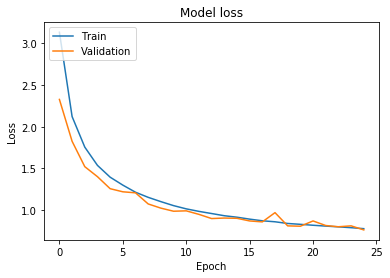

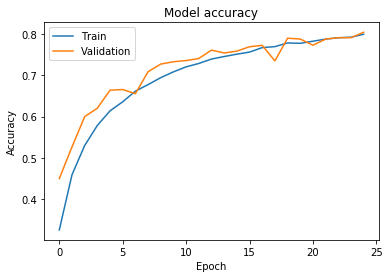

Dropout 0.5


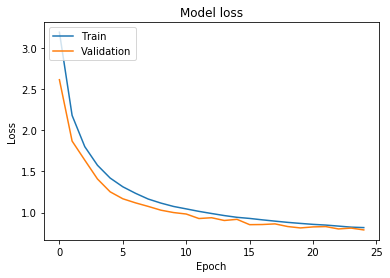

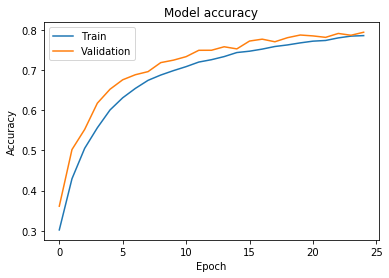

Dropout increasing from 0.15 -> 0.45


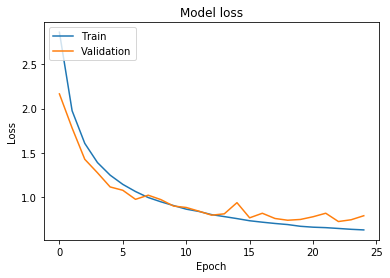

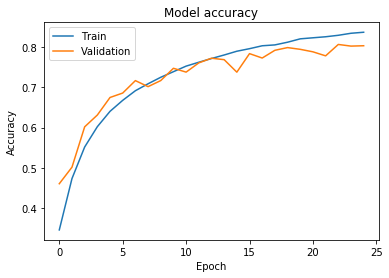

In [0]:
print("Dropout 0.25")
plot_graphs(history1)

print("Dropout 0.5")
plot_graphs(history2)

print("Dropout increasing from 0.15 -> 0.45")
plot_graphs(history3)

## **Model #4 - Regularization Dropout and Weight Decay**

#### Now, we will try combining the dropout and weight decay regularizations together to see if they are better than our best dropout layers (0.25 and 0.15->0.45)

### Dropout 0.25, weight decay 0.0005

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', 
                 kernel_initializer='random_uniform',
                 kernel_regularizer=regularizers.l2(),
                 input_shape=shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3),
                 padding='same',
                 kernel_initializer='random_uniform',
                 kernel_regularizer=regularizers.l2()))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3),
                 padding='same',
                 kernel_initializer='random_uniform',
                 kernel_regularizer=regularizers.l2()))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3),
                 padding='same',
                 kernel_initializer='random_uniform',
                 kernel_regularizer=regularizers.l2()))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3),
                 padding='same',
                 kernel_initializer='random_uniform',
                 kernel_regularizer=regularizers.l2()))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3),
                 padding='same',
                 kernel_initializer='random_uniform',
                 kernel_regularizer=regularizers.l2()))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Compile the model
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

#Train model
history1 = model.fit(x_train,
          to_categorical(y_train, num_classes),
          epochs=epochs,
          verbose=2,
          validation_split=0.2,
          shuffle=True)

#Save model
model.save('model_4_part1.h5', overwrite=True)


Train on 40000 samples, validate on 10000 samples
Epoch 1/25
40000/40000 - 21s - loss: 3.1346 - acc: 0.3250 - val_loss: 2.3277 - val_acc: 0.4496
Epoch 2/25
40000/40000 - 13s - loss: 2.1222 - acc: 0.4586 - val_loss: 1.8253 - val_acc: 0.5261
Epoch 3/25
40000/40000 - 14s - loss: 1.7554 - acc: 0.5297 - val_loss: 1.5207 - val_acc: 0.5998
Epoch 4/25
40000/40000 - 13s - loss: 1.5361 - acc: 0.5784 - val_loss: 1.4004 - val_acc: 0.6203
Epoch 5/25
40000/40000 - 13s - loss: 1.3944 - acc: 0.6138 - val_loss: 1.2562 - val_acc: 0.6639
Epoch 6/25
40000/40000 - 13s - loss: 1.2991 - acc: 0.6358 - val_loss: 1.2189 - val_acc: 0.6656
Epoch 7/25
40000/40000 - 13s - loss: 1.2137 - acc: 0.6616 - val_loss: 1.2066 - val_acc: 0.6554
Epoch 8/25
40000/40000 - 13s - loss: 1.1523 - acc: 0.6775 - val_loss: 1.0730 - val_acc: 0.7088
Epoch 9/25
40000/40000 - 13s - loss: 1.1008 - acc: 0.6944 - val_loss: 1.0228 - val_acc: 0.7273
Epoch 10/25
40000/40000 - 13s - loss: 1.0529 - acc: 0.7084 - val_loss: 0.9856 - val_acc: 0.7329

### Dropout increasing, weight decay 0.0005

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', 
                 kernel_initializer='random_uniform',
                 kernel_regularizer=regularizers.l2(),
                 input_shape=shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3),
                 padding='same',
                 kernel_initializer='random_uniform',
                 kernel_regularizer=regularizers.l2()))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.15))

model.add(Conv2D(64, (3, 3),
                 padding='same',
                 kernel_initializer='random_uniform',
                 kernel_regularizer=regularizers.l2()))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3),
                 padding='same',
                 kernel_initializer='random_uniform',
                 kernel_regularizer=regularizers.l2()))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3),
                 padding='same',
                 kernel_initializer='random_uniform',
                 kernel_regularizer=regularizers.l2()))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3),
                 padding='same',
                 kernel_initializer='random_uniform',
                 kernel_regularizer=regularizers.l2()))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.45))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Compile the model
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

#Train model
history2 = model.fit(x_train,
          to_categorical(y_train, num_classes),
          epochs=epochs,
          verbose=2,
          validation_split=0.2,
          shuffle=True)

#Save model
model.save('model_4_part2.h5', overwrite=True)


Train on 40000 samples, validate on 10000 samples
Epoch 1/25
40000/40000 - 21s - loss: 3.1879 - acc: 0.3022 - val_loss: 2.6121 - val_acc: 0.3612
Epoch 2/25
40000/40000 - 13s - loss: 2.1792 - acc: 0.4294 - val_loss: 1.8680 - val_acc: 0.5020
Epoch 3/25
40000/40000 - 13s - loss: 1.8000 - acc: 0.5050 - val_loss: 1.6364 - val_acc: 0.5520
Epoch 4/25
40000/40000 - 13s - loss: 1.5745 - acc: 0.5561 - val_loss: 1.4080 - val_acc: 0.6173
Epoch 5/25
40000/40000 - 13s - loss: 1.4192 - acc: 0.6004 - val_loss: 1.2522 - val_acc: 0.6520
Epoch 6/25
40000/40000 - 13s - loss: 1.3133 - acc: 0.6307 - val_loss: 1.1678 - val_acc: 0.6755
Epoch 7/25
40000/40000 - 13s - loss: 1.2342 - acc: 0.6541 - val_loss: 1.1183 - val_acc: 0.6881
Epoch 8/25
40000/40000 - 13s - loss: 1.1647 - acc: 0.6741 - val_loss: 1.0753 - val_acc: 0.6958
Epoch 9/25
40000/40000 - 13s - loss: 1.1156 - acc: 0.6873 - val_loss: 1.0295 - val_acc: 0.7182
Epoch 10/25
40000/40000 - 13s - loss: 1.0747 - acc: 0.6982 - val_loss: 1.0007 - val_acc: 0.7243

### Dropout increasing, weight decay 0.0005, both alternating

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', 
                 kernel_initializer='random_uniform',
                 kernel_regularizer=regularizers.l2(),
                 input_shape=shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3),
                 padding='same',
                 kernel_initializer='random_uniform',
                  kernel_regularizer=regularizers.l2()))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3),
                 padding='same',
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3),
                 padding='same',
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3),
                 padding='same',
                 kernel_initializer='random_uniform',
                 kernel_regularizer=regularizers.l2()))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3),
                 padding='same',
                 kernel_initializer='random_uniform',
                 kernel_regularizer=regularizers.l2()))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Compile the model
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

#Train model
history3 = model.fit(x_train,
          to_categorical(y_train, num_classes),
          epochs=epochs,
          verbose=2,
          validation_split=0.2,
          shuffle=True)

#Save model
model.save('model_4_part3.h5', overwrite=True)


Train on 40000 samples, validate on 10000 samples
Epoch 1/25
40000/40000 - 21s - loss: 2.8603 - acc: 0.3458 - val_loss: 2.1650 - val_acc: 0.4605
Epoch 2/25
40000/40000 - 13s - loss: 1.9755 - acc: 0.4733 - val_loss: 1.7810 - val_acc: 0.5016
Epoch 3/25
40000/40000 - 13s - loss: 1.6072 - acc: 0.5516 - val_loss: 1.4278 - val_acc: 0.6018
Epoch 4/25
40000/40000 - 13s - loss: 1.3911 - acc: 0.6022 - val_loss: 1.2760 - val_acc: 0.6311
Epoch 5/25
40000/40000 - 13s - loss: 1.2491 - acc: 0.6403 - val_loss: 1.1161 - val_acc: 0.6747
Epoch 6/25
40000/40000 - 13s - loss: 1.1450 - acc: 0.6676 - val_loss: 1.0785 - val_acc: 0.6857
Epoch 7/25
40000/40000 - 13s - loss: 1.0644 - acc: 0.6915 - val_loss: 0.9764 - val_acc: 0.7166
Epoch 8/25
40000/40000 - 13s - loss: 0.9969 - acc: 0.7087 - val_loss: 1.0232 - val_acc: 0.7016
Epoch 9/25
40000/40000 - 13s - loss: 0.9486 - acc: 0.7249 - val_loss: 0.9733 - val_acc: 0.7167
Epoch 10/25
40000/40000 - 13s - loss: 0.9062 - acc: 0.7387 - val_loss: 0.9004 - val_acc: 0.7472

### Validation

#### From the graphs below, it seems like alternating increasing dropout from 0.15 to 0.45 and and weight decay of 0.0005 increases accuracy and minimizes the training and validation loss the most. However, just increasing the dropout 0.15 to 0.45 produced similar accuracies but minimized the training and validation loss moreso than the combination of dropout and weight decay.

#### For the section below, we will proceed by using seeing how normalization impacts our best models so far.
1. increasing dropout from 0.15 to 0.45
2. increasing dropout from 0.15 to 0.45 and and weight decay of 0.0005) 

Dropout 0.25, weight decay 0.0005


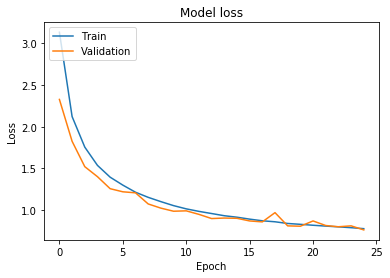

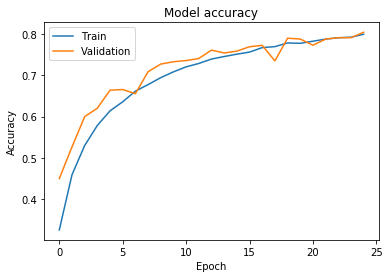

Dropout increasing from 0.15 -> 0.45, weight decay 0.0005


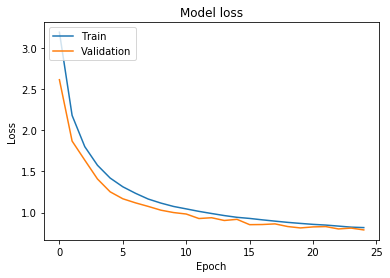

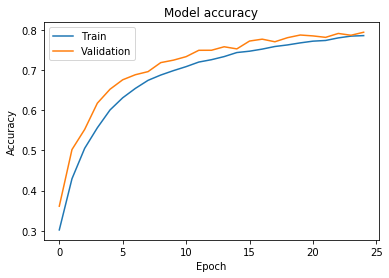

Alternating dropout (increasing) and weight decay 0.0005


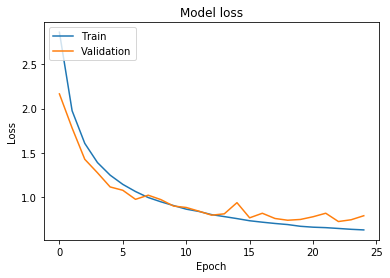

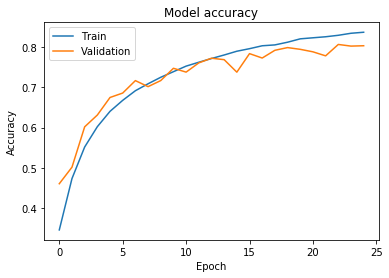

In [0]:
print("Dropout 0.25, weight decay 0.0005")
plot_graphs(history1)

print("Dropout increasing from 0.15 -> 0.45, weight decay 0.0005")
plot_graphs(history2)

print("Alternating dropout (increasing) and weight decay 0.0005")
plot_graphs(history3)

## Model #5 - Normalization

#### Now that we added regularization to the model, let's also add normalization. We will add Batch Normalization, which will normalize the activations of the previous hidden layer at each batch.

#### Let's see how regularizing and normalizing the layers compares to just regularizing. 

### Dropout increasing with normalization

In [0]:
from tensorflow.keras.layers import BatchNormalization
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', 
                 kernel_initializer='random_uniform',
                 input_shape=shape))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3),
                 padding='same',
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.15))

model.add(Conv2D(64, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.45))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Compile the model
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

#Train model
history1 = model.fit(x_train,
          to_categorical(y_train, num_classes),
          epochs=epochs,
          verbose=2,
          validation_split=0.2,
          shuffle=True)

#Save model
model.save('model_5_part1.h5', overwrite=True)


Train on 40000 samples, validate on 10000 samples
Epoch 1/25
40000/40000 - 12s - loss: 2.2320 - acc: 0.3167 - val_loss: 1.5173 - val_acc: 0.4633
Epoch 2/25
40000/40000 - 11s - loss: 1.6244 - acc: 0.4555 - val_loss: 1.2026 - val_acc: 0.5707
Epoch 3/25
40000/40000 - 11s - loss: 1.3475 - acc: 0.5423 - val_loss: 1.0285 - val_acc: 0.6400
Epoch 4/25
40000/40000 - 11s - loss: 1.1582 - acc: 0.5988 - val_loss: 1.0622 - val_acc: 0.6421
Epoch 5/25
40000/40000 - 11s - loss: 1.0363 - acc: 0.6397 - val_loss: 0.9257 - val_acc: 0.6761
Epoch 6/25
40000/40000 - 11s - loss: 0.9441 - acc: 0.6712 - val_loss: 0.7996 - val_acc: 0.7215
Epoch 7/25
40000/40000 - 11s - loss: 0.8747 - acc: 0.6949 - val_loss: 0.7942 - val_acc: 0.7193
Epoch 8/25
40000/40000 - 11s - loss: 0.8148 - acc: 0.7177 - val_loss: 0.7697 - val_acc: 0.7230
Epoch 9/25
40000/40000 - 11s - loss: 0.7700 - acc: 0.7346 - val_loss: 0.7907 - val_acc: 0.7294
Epoch 10/25
40000/40000 - 11s - loss: 0.7267 - acc: 0.7487 - val_loss: 0.7276 - val_acc: 0.7484

Dropout increasing with normalization


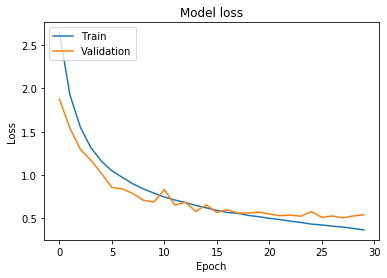

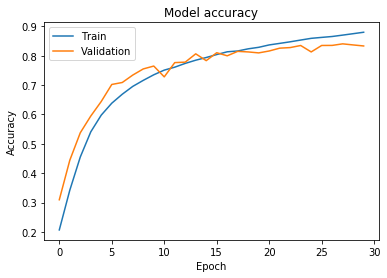

In [0]:
print("Dropout increasing with normalization")
plot_graphs(history1)

#### We see that the model above is overfitting the training data. We will add more regularization (both dropout and weight decay). 




#### Dropout increasing 0.15 ->0.45 and weight decay = 0.005 with normalization

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', 
                 kernel_initializer='random_uniform',
                 kernel_regularizer=regularizers.l2(),
                 input_shape=shape))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3),
                 padding='same',
                 kernel_initializer='random_uniform',
                  kernel_regularizer=regularizers.l2()))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.15))

model.add(Conv2D(64, (3, 3),
                 padding='same',
                 kernel_initializer='random_uniform',
                 kernel_regularizer=regularizers.l2()))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3),
                 padding='same',
                 kernel_initializer='random_uniform',
                 kernel_regularizer=regularizers.l2()))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3),
                 padding='same',
                 kernel_initializer='random_uniform',
                 kernel_regularizer=regularizers.l2()))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3),
                 padding='same',
                 kernel_initializer='random_uniform',
                 kernel_regularizer=regularizers.l2()))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.45))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Compile the model
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

#Train model
history2 = model.fit(x_train,
          to_categorical(y_train, num_classes),
          epochs=epochs,
          verbose=2,
          validation_split=0.2,
          shuffle=True)

#Save model
model.save('model_5_part2.h5', overwrite=True)

Train on 40000 samples, validate on 10000 samples
Epoch 1/25
40000/40000 - 13s - loss: 4.5092 - acc: 0.3197 - val_loss: 3.5261 - val_acc: 0.5139
Epoch 2/25
40000/40000 - 12s - loss: 3.5274 - acc: 0.4775 - val_loss: 3.0077 - val_acc: 0.5600
Epoch 3/25
40000/40000 - 12s - loss: 2.8864 - acc: 0.5605 - val_loss: 2.4447 - val_acc: 0.6447
Epoch 4/25
40000/40000 - 12s - loss: 2.4109 - acc: 0.6084 - val_loss: 2.0729 - val_acc: 0.6781
Epoch 5/25
40000/40000 - 12s - loss: 2.0308 - acc: 0.6532 - val_loss: 1.7648 - val_acc: 0.7029
Epoch 6/25
40000/40000 - 12s - loss: 1.7419 - acc: 0.6842 - val_loss: 1.5506 - val_acc: 0.7170
Epoch 7/25
40000/40000 - 12s - loss: 1.5166 - acc: 0.7105 - val_loss: 1.3802 - val_acc: 0.7383
Epoch 8/25
40000/40000 - 12s - loss: 1.3595 - acc: 0.7301 - val_loss: 1.2005 - val_acc: 0.7689
Epoch 9/25
40000/40000 - 12s - loss: 1.2229 - acc: 0.7485 - val_loss: 1.1307 - val_acc: 0.7699
Epoch 10/25
40000/40000 - 12s - loss: 1.1216 - acc: 0.7602 - val_loss: 1.0203 - val_acc: 0.7881

Dropout increasing from 0.15 -> 0.45, weight decay 0.0005, normalization after each layer


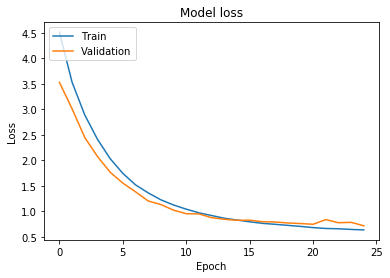

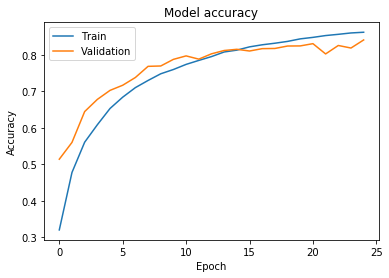

In [0]:
print("Dropout increasing from 0.15 -> 0.45, weight decay 0.0005, normalization after each layer")
plot_graphs(history2)


### Validation

#### Looking at the graphs above as well as the graphs in our model #3 and model #4, normalization has improved both our accuracy and has reduced the validation/training loss. We will keep this in our model. We will also use the dropout increasing for the regularization because it reduces overfitting more than if we add weight decay. 

## **Model #6 - Optimizers**

#### In the first model, we arbitrarily chose the "RMSprop" optimizer. Now we will try several other optimizers to see which one produces the best results. However, we will also increase the number of epochs. 


### RMSprop

In [0]:
epochs = 25

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', 
                 kernel_initializer='random_uniform',
                 input_shape=shape))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3),
                 padding='same',
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.15))

model.add(Conv2D(64, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.45))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Compile the model
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

#Train model
history1 = model.fit(x_train,
          to_categorical(y_train, num_classes),
          epochs=epochs,
          verbose=2,
          validation_split=0.2,
          shuffle=True)

#Save model
model.save('model_6_part1.h5', overwrite=True)

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 - 13s - loss: 2.2848 - acc: 0.3016 - val_loss: 1.5005 - val_acc: 0.4640
Epoch 2/50
40000/40000 - 12s - loss: 1.6665 - acc: 0.4458 - val_loss: 1.3384 - val_acc: 0.5169
Epoch 3/50
40000/40000 - 12s - loss: 1.4028 - acc: 0.5221 - val_loss: 1.0763 - val_acc: 0.6161
Epoch 4/50
40000/40000 - 12s - loss: 1.2039 - acc: 0.5833 - val_loss: 1.0893 - val_acc: 0.6208
Epoch 5/50
40000/40000 - 12s - loss: 1.0739 - acc: 0.6280 - val_loss: 0.8896 - val_acc: 0.6819
Epoch 6/50
40000/40000 - 12s - loss: 0.9801 - acc: 0.6603 - val_loss: 0.8239 - val_acc: 0.7085
Epoch 7/50
40000/40000 - 12s - loss: 0.8989 - acc: 0.6848 - val_loss: 0.7973 - val_acc: 0.7216
Epoch 8/50
40000/40000 - 12s - loss: 0.8389 - acc: 0.7101 - val_loss: 0.7316 - val_acc: 0.7485
Epoch 9/50
40000/40000 - 12s - loss: 0.7892 - acc: 0.7254 - val_loss: 0.6843 - val_acc: 0.7588
Epoch 10/50
40000/40000 - 12s - loss: 0.7480 - acc: 0.7391 - val_loss: 0.7494 - val_acc: 0.7380

### SGD - Stochastic gradient descent optimizer

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', 
                 kernel_initializer='random_uniform',
                 input_shape=shape))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3),
                 padding='same',
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.15))

model.add(Conv2D(64, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.45))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Compile the model
opt = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

#Train model
history2 = model.fit(x_train,
          to_categorical(y_train, num_classes),
          epochs=epochs,
          verbose=2,
          validation_split=0.2,
          shuffle=True)

#Save model
model.save('model_6_part2.h5', overwrite=True)

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 - 14s - loss: 1.8051 - acc: 0.3739 - val_loss: 1.4150 - val_acc: 0.5021
Epoch 2/50
40000/40000 - 11s - loss: 1.3103 - acc: 0.5346 - val_loss: 1.0651 - val_acc: 0.6146
Epoch 3/50
40000/40000 - 11s - loss: 1.0742 - acc: 0.6229 - val_loss: 0.9073 - val_acc: 0.6793
Epoch 4/50
40000/40000 - 11s - loss: 0.9253 - acc: 0.6745 - val_loss: 0.7608 - val_acc: 0.7305
Epoch 5/50
40000/40000 - 11s - loss: 0.8235 - acc: 0.7096 - val_loss: 0.6986 - val_acc: 0.7562
Epoch 6/50
40000/40000 - 11s - loss: 0.7481 - acc: 0.7397 - val_loss: 0.6321 - val_acc: 0.7782
Epoch 7/50
40000/40000 - 11s - loss: 0.6873 - acc: 0.7604 - val_loss: 0.6395 - val_acc: 0.7756
Epoch 8/50
40000/40000 - 11s - loss: 0.6429 - acc: 0.7775 - val_loss: 0.5805 - val_acc: 0.8006
Epoch 9/50
40000/40000 - 11s - loss: 0.6040 - acc: 0.7907 - val_loss: 0.5761 - val_acc: 0.8011
Epoch 10/50
40000/40000 - 11s - loss: 0.5760 - acc: 0.8007 - val_loss: 0.5828 - val_acc: 0.7995

### Adagrad

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', 
                 kernel_initializer='random_uniform',
                 input_shape=shape))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3),
                 padding='same',
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.15))

model.add(Conv2D(64, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.45))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Compile the model
opt = keras.optimizers.Adagrad(learning_rate=0.01)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

#Train model
history3 = model.fit(x_train,
          to_categorical(y_train, num_classes),
          epochs=epochs,
          verbose=2,
          validation_split=0.2,
          shuffle=True)

#Save model
model.save('model_6_part3.h5', overwrite=True)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 - 14s - loss: 1.7443 - acc: 0.4086 - val_loss: 1.1958 - val_acc: 0.5661
Epoch 2/50
40000/40000 - 11s - loss: 1.2376 - acc: 0.5635 - val_loss: 1.0010 - val_acc: 0.6428
Epoch 3/50
40000/40000 - 11s - loss: 1.0434 - acc: 0.6277 - val_loss: 0.9030 - val_acc: 0.6806
Epoch 4/50
40000/40000 - 11s - loss: 0.9333 - acc: 0.6696 - val_loss: 0.8655 - val_acc: 0.6870
Epoch 5/50
40000/40000 - 11s - loss: 0.8611 - acc: 0.6963 - val_loss: 0.7300 - val_acc: 0.7430
Epoch 6/50
40000/40000 - 11s - loss: 0.7979 - acc: 0.7198 - val_loss: 0.7097 - val_acc: 0.7463
Epoch 7/50
40000/40000 - 11s - loss: 0.7545 - acc: 0.7372 - val_loss: 0.6592 - val_acc: 0.7662
Epoch 8/50
40000/40000 - 11s - loss: 0.7194 - acc: 0.7486 - val_loss: 0.6989 - val_acc: 0.7541
Epoch 9/50
40000/40000 - 11s - loss: 0.6848 - acc: 0.7596 - val_loss: 0.

### Adadelta

#### A robust extension of Adagrad that adapts learning rates based on a moving window of gradient updates
(source https://keras.io/optimizers/) 

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', 
                 kernel_initializer='random_uniform',
                 input_shape=shape))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3),
                 padding='same',
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.15))

model.add(Conv2D(64, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.45))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Compile the model
opt = keras.optimizers.Adadelta(learning_rate=1.0, rho=0.95)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

#Train model
history4 = model.fit(x_train,
          to_categorical(y_train, num_classes),
          epochs=epochs,
          verbose=2,
          validation_split=0.2,
          shuffle=True)

#Save model
model.save('model_6_part4.h5', overwrite=True)

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 - 14s - loss: 1.6527 - acc: 0.4318 - val_loss: 1.2876 - val_acc: 0.5391
Epoch 2/50
40000/40000 - 11s - loss: 1.0363 - acc: 0.6357 - val_loss: 1.2510 - val_acc: 0.6011
Epoch 3/50
40000/40000 - 11s - loss: 0.8458 - acc: 0.7068 - val_loss: 0.7598 - val_acc: 0.7344
Epoch 4/50
40000/40000 - 11s - loss: 0.7398 - acc: 0.7442 - val_loss: 0.6771 - val_acc: 0.7661
Epoch 5/50
40000/40000 - 11s - loss: 0.6627 - acc: 0.7688 - val_loss: 0.7105 - val_acc: 0.7532
Epoch 6/50
40000/40000 - 11s - loss: 0.6178 - acc: 0.7850 - val_loss: 0.6000 - val_acc: 0.7932
Epoch 7/50
40000/40000 - 11s - loss: 0.5658 - acc: 0.8049 - val_loss: 0.5570 - val_acc: 0.8109
Epoch 8/50
40000/40000 - 11s - loss: 0.5270 - acc: 0.8176 - val_loss: 0.5395 - val_acc: 0.8187
Epoch 9/50
40000/40000 - 11s - loss: 0.4941 - acc: 0.8307 - val_loss: 0.5526 - val_acc: 0.8123
Epoch 10/50
40000/40000 - 11s - loss: 0.4726 - acc: 0.8379 - val_loss: 0.5618 - val_acc: 0.8110

### Validation

Optimizers/n
RMSprop


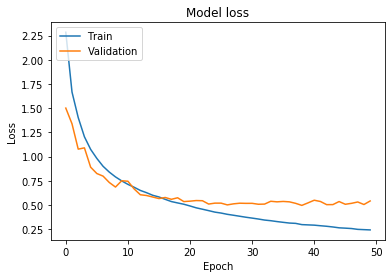

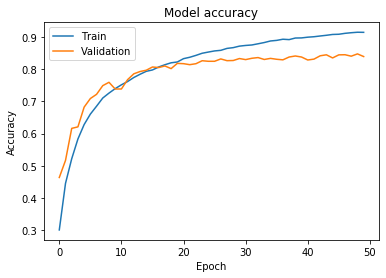

SGD


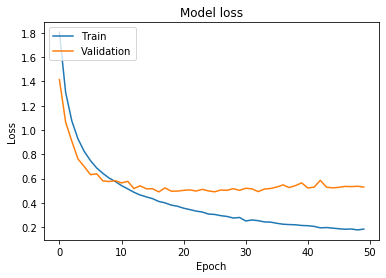

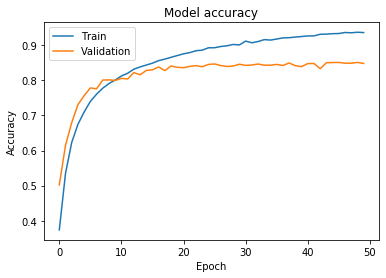

Adagrad


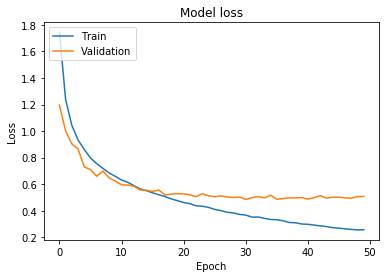

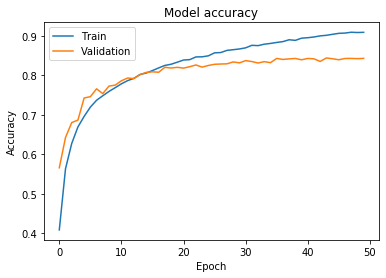

Adadelta


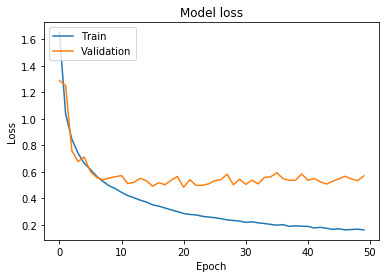

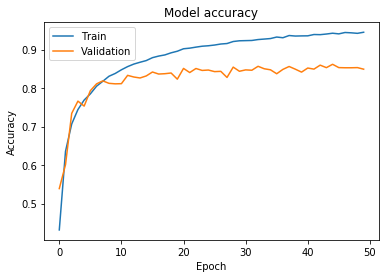

In [0]:
print("Optimizers/n")

print("RMSprop")
plot_graphs(history1)

print("SGD")
plot_graphs(history2)

print("Adagrad")
plot_graphs(history3)

print("Adadelta")
plot_graphs(history4)


### Validation Results

#### From the graphs as well as the output per model, we can see that all optimizers tend to start overfitting after around 25 epochs. To counteract this, we need to increase the regularization (dropout layer) or we can limit the epochs to 25. Since the accuracy doesn't seem to increase much after 25, we will keep it around 25. 

#### At around epoch 25, all the optimizers seem to perform very similarly, with small differences with increase in accuracy for slightly more overfitted models. To create our final models, we will stick to 30 for number of epochs and RMSprop and Adadelta for our optimizers (best fit model and most accurate model) and slightly increase the regularization. 

## **Model #7 - Final touches**

#### For our final models, we will increase the number of layers to see if that increases our accuracy and reduces the training/validation loss. Along with the increased number of layers, based on model #6, we will increase the number of epochs slightly to 30 along with slightly higher regularization (dropout increases from 0.25 -> 0.55)

In [0]:
epochs = 30

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', 
                 kernel_initializer='random_uniform',
                 input_shape=shape))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3),
                 padding='same',
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

model.add(Conv2D(256, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.45))

model.add(Conv2D(512, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.55))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.55))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Compile the model
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

#Train model
history1 = model.fit(x_train,
          to_categorical(y_train, num_classes),
          epochs=epochs,
          verbose=2,
          validation_split=0.2,
          shuffle=True)

#Save model
model.save('model_7_part1.h5', overwrite=True)

Train on 40000 samples, validate on 10000 samples
Epoch 1/30
40000/40000 - 36s - loss: 2.8870 - acc: 0.1779 - val_loss: 1.9347 - val_acc: 0.2806
Epoch 2/30
40000/40000 - 24s - loss: 2.0701 - acc: 0.3055 - val_loss: 1.5718 - val_acc: 0.4171
Epoch 3/30
40000/40000 - 25s - loss: 1.6754 - acc: 0.4223 - val_loss: 1.3655 - val_acc: 0.5190
Epoch 4/30
40000/40000 - 25s - loss: 1.4175 - acc: 0.5077 - val_loss: 1.3039 - val_acc: 0.5410
Epoch 5/30
40000/40000 - 25s - loss: 1.2404 - acc: 0.5747 - val_loss: 1.0291 - val_acc: 0.6402
Epoch 6/30
40000/40000 - 25s - loss: 1.1190 - acc: 0.6182 - val_loss: 0.9412 - val_acc: 0.6748
Epoch 7/30
40000/40000 - 25s - loss: 1.0191 - acc: 0.6506 - val_loss: 0.8903 - val_acc: 0.6860
Epoch 8/30
40000/40000 - 25s - loss: 0.9466 - acc: 0.6790 - val_loss: 0.7647 - val_acc: 0.7351
Epoch 9/30
40000/40000 - 24s - loss: 0.8887 - acc: 0.7010 - val_loss: 0.7762 - val_acc: 0.7299
Epoch 10/30
40000/40000 - 25s - loss: 0.8385 - acc: 0.7187 - val_loss: 0.7193 - val_acc: 0.7529

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', 
                 kernel_initializer='random_uniform',
                 input_shape=shape))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3),
                 padding='same',
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.15))

model.add(Conv2D(64, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

model.add(Conv2D(256, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.45))

model.add(Conv2D(512, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), 
                 padding='same', 
                 kernel_initializer='random_uniform'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.55))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.55))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Compile the model
opt = keras.optimizers.Adadelta(learning_rate=1.0, rho=0.95)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

#Train model
history2 = model.fit(x_train,
          to_categorical(y_train, num_classes),
          epochs=epochs,
          verbose=2,
          validation_split=0.2,
          shuffle=True)

#Save model
model.save('model_7_part2.h5', overwrite=True)

Train on 40000 samples, validate on 10000 samples
Epoch 1/30
40000/40000 - 36s - loss: 2.0485 - acc: 0.3242 - val_loss: 1.6751 - val_acc: 0.4436
Epoch 2/30
40000/40000 - 23s - loss: 1.2756 - acc: 0.5503 - val_loss: 1.0582 - val_acc: 0.6302
Epoch 3/30
40000/40000 - 23s - loss: 1.0445 - acc: 0.6426 - val_loss: 0.9104 - val_acc: 0.6892
Epoch 4/30
40000/40000 - 23s - loss: 0.8943 - acc: 0.6961 - val_loss: 0.7240 - val_acc: 0.7513
Epoch 5/30
40000/40000 - 23s - loss: 0.7978 - acc: 0.7339 - val_loss: 0.6624 - val_acc: 0.7795
Epoch 6/30
40000/40000 - 23s - loss: 0.7175 - acc: 0.7616 - val_loss: 0.6401 - val_acc: 0.7817
Epoch 7/30
40000/40000 - 23s - loss: 0.6604 - acc: 0.7804 - val_loss: 0.5858 - val_acc: 0.8040
Epoch 8/30
40000/40000 - 23s - loss: 0.6089 - acc: 0.7995 - val_loss: 0.6338 - val_acc: 0.7917
Epoch 9/30
40000/40000 - 23s - loss: 0.5638 - acc: 0.8143 - val_loss: 0.5560 - val_acc: 0.8157
Epoch 10/30
40000/40000 - 23s - loss: 0.5292 - acc: 0.8255 - val_loss: 0.5361 - val_acc: 0.8158

### Validation

RMSprop


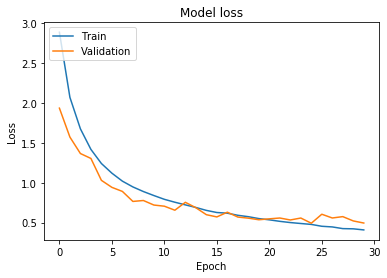

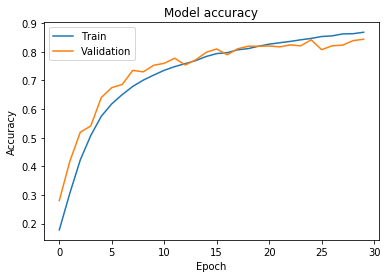

Adadelta


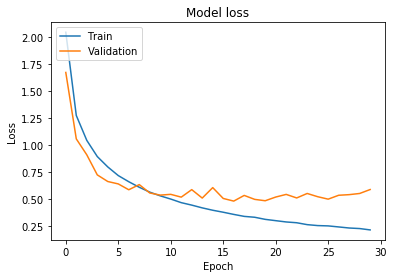

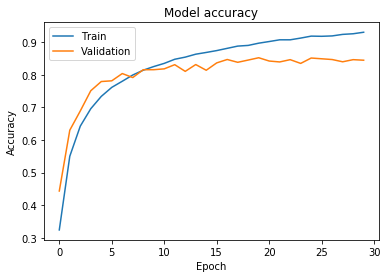

In [0]:
print("RMSprop")
plot_graphs(history1)

print("Adadelta")
plot_graphs(history2)

## Final Model (Choosing the best one)

#### The final model we will chooose is model #7 part 1. This model uses the optimizer RMSprop, uses an increasing dropout of 0.25 -> 0.55 regularizer, Batch Normalization after every layer, 30 epochs with batch size 32, and 10 cnn layers followed by a flattening layer.

#### Net architecture is printed below along with training/validation accuracy and loss graph.

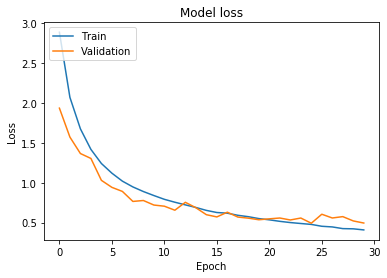

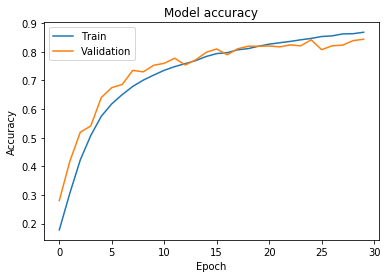

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_204 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
activation_254 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_220 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_205 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_255 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_221 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_101 (MaxPoolin (None, 16, 16, 32)      

In [0]:
plot_graphs(history1)
model = load_model("model_7_part1.h5")
print(model.summary())

## Testing Against Final Model


#### We will finally test our best model using the test data that we saved in the beginning. The following is the classification report and confusion matrix (created using helper functions in the second defined in the second section - useful helper functions). 

In [0]:
get_metrics("model_7_part1.h5")




10000/10000 [==============================] - 6s 626us/sample - loss: 0.5163 - acc: 0.8375
[0.5162984648227692, 0.8375]
              precision    recall  f1-score   support

    airplane       0.83      0.86      0.84      1000
  automobile       0.92      0.93      0.92      1000
        bird       0.82      0.72      0.77      1000
         cat       0.71      0.64      0.68      1000
        deer       0.82      0.85      0.84      1000
         dog       0.75      0.77      0.76      1000
        frog       0.84      0.90      0.87      1000
       horse       0.88      0.88      0.88      1000
        ship       0.91      0.89      0.90      1000
       truck       0.87      0.93      0.90      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

            predicted - airplane  predicted - automobile  predicted - bird  \
airplane                     862          

# Conclusion/Results

#### In this project, we started by processing our data set and dividing our data into our training set and our test set. With our training set, we divided this into 80% training and 20% validation for each model (using the validation_split=0.2 variable when training the training data). 

#### In our first model, we created a 6 layer cnn along with a flatten layer. We used an arbitrary optimizer (RMSprop) to begin with. As seen by the training/validation loss graph, our model was highly overfitting the data. Thus, regularization was needed.

#### With our second, third, and fourth models, we tried various parameters to regularize our data. In our second model, we tried using different weight decays to regularize (0, 0.00005, 0.0005, and 0.05). In our third model, we tried using different dropout layers (0.25, 0.5, and an increasing 0.15->0.45). In our fourth model, we used a combination of weight decay and dropout. With all these regularization techniques, it was determined that either the increasing dropout layer or the increasing dropout layer plus weight decay of 0.0005 best prevented overfitting while keeping accuracy up.

#### In our fifth model, we added normalization using Batch Normalization. Batch Normalization was added to each previous hidden layer at each batch and worked to reduce some overfitting and improve accuracy overall.

#### In our sixth model, we tried using different optimizers and epoch size 50. In the end, epochs of size 50 started overfitting the data and the good mixture of accuracy and preventing overfitting seemed to be around 30 epochs. The optimizers seemed to be relatively similar in performance, with RMSprop having the least difference between the training and validation loss and AdaDelta having the best overall accuracy on the validation data.

#### In our seventh and final model sets, we tried adjusting the epoch number to 35 as well as increasing the 6 layer cnn to 10 layers (plus the flatten layer). 

#### Overall, the seventh model's first model seemed to have the best mixture of accuracy and minimizing the training and validation model loss. Thus, we chose this as our final model and ran this against our test set that we saved in the beginning. 


## Results
#### As stated in the Final Model section, the final model we chose and ran our test against is model #7 part 1. This model uses the optimizer RMSprop, uses an increasing dropout of 0.25 -> 0.55 for regularization, Batch Normalization after every layer, 30 epochs with batch size 32, and 10 cnn layers followed by a flattening layer. 
#### The net architecture is as following:


In [0]:
model = load_model("model_7_part1.h5")
print(model.summary())

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_204 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
activation_254 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_220 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_205 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_255 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_221 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_101 (MaxPoolin (None, 16, 16, 32)      

#### By testing our model, we ended up having an overall accuracy, recall, and f1-score of 0.84. Generally, most of the error came from not being able to properly distinguish cats and dogs as well as smaller errors coming from having difficulty distinguishing animals in general. The model did relatively better in accurately classifying inanimate objects (ships, trucks, airplanes, and automobiles). The accuracy of predictions could be potentially improved by training the model without these inanimate objects and including more training data of the similar animals (cats and dogs). This might allow the model to find smaller differences between animals that may be of similar sizes or have similar features (like cats and dogs). 

